Importando as bibliotecas

In [2]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import numpy as np
import warnings as ws
ws.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
#Ajustando o tamanho e estilo dos gráficos
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = (5,4)

**1. Coleta dos Dados**

In [4]:
#Lendo o Dataset
crimes = pd.read_csv('crime.csv')

In [5]:
crimes.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [6]:
#Visão geral do dataset.
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530652 entries, 0 to 530651
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           530652 non-null  object 
 1   YEAR           530652 non-null  int64  
 2   MONTH          530652 non-null  int64  
 3   DAY            530652 non-null  int64  
 4   HOUR           476290 non-null  float64
 5   MINUTE         476290 non-null  float64
 6   HUNDRED_BLOCK  530639 non-null  object 
 7   NEIGHBOURHOOD  474028 non-null  object 
 8   X              530652 non-null  float64
 9   Y              530652 non-null  float64
 10  Latitude       530652 non-null  float64
 11  Longitude      530652 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 48.6+ MB


In [7]:
#Obtendo o número de linhas e colunas.
crimes.shape

(530652, 12)

**2. Limpeza e Pré-Processamento dos Dados**

*2.1 Limpeza dos Dados*

In [8]:
#Verificando a existência de dados nulos no Dataset.
crimes.isnull().sum()

TYPE                 0
YEAR                 0
MONTH                0
DAY                  0
HOUR             54362
MINUTE           54362
HUNDRED_BLOCK       13
NEIGHBOURHOOD    56624
X                    0
Y                    0
Latitude             0
Longitude            0
dtype: int64

In [9]:
#Excluindo linhas com dados nulos no dataset, pois o número de dados ausentes é menor que 10% do total de entradas no dataset.
crimes.dropna(inplace=True)

In [10]:
#Confirmando a exclusão das linhas com dados ausentes.
crimes.isnull().sum()

TYPE             0
YEAR             0
MONTH            0
DAY              0
HOUR             0
MINUTE           0
HUNDRED_BLOCK    0
NEIGHBOURHOOD    0
X                0
Y                0
Latitude         0
Longitude        0
dtype: int64

In [11]:
#Excluindo atributos que não serão utilizados na análise.
crimes.drop(columns=['MINUTE','HUNDRED_BLOCK','X', 'Y', 'Latitude', 'Longitude'], axis=1, inplace=True) 

In [12]:
crimes.head()

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD
0,Other Theft,2003,5,12,16.0,Strathcona
1,Other Theft,2003,5,7,15.0,Strathcona
2,Other Theft,2003,4,23,16.0,Strathcona
3,Other Theft,2003,4,20,11.0,Strathcona
4,Other Theft,2003,4,12,17.0,Strathcona


*2.2 Pré-Processamento dos Dados*

In [13]:
# Criando um atributo para coletar e converter os valores da data e transformá-lo em Datetime.
crimes['Data'] = pd.to_datetime({'year':crimes['YEAR'],'month':crimes['MONTH'],'day':crimes['DAY']}, format="%m-%d-%Y")

In [14]:
crimes.head()

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD,Data
0,Other Theft,2003,5,12,16.0,Strathcona,2003-05-12
1,Other Theft,2003,5,7,15.0,Strathcona,2003-05-07
2,Other Theft,2003,4,23,16.0,Strathcona,2003-04-23
3,Other Theft,2003,4,20,11.0,Strathcona,2003-04-20
4,Other Theft,2003,4,12,17.0,Strathcona,2003-04-12


In [15]:
# Adicionando o atributo Data como index do Dataframe.
crimes.index = pd.to_datetime(crimes.Data, format="%m-%d-%Y")

In [16]:
# Visualizando novamente o Dataframe
crimes.head()

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD,Data
Data,,,,,,,
2003-05-12,Other Theft,2003,5,12,16.0,Strathcona,2003-05-12
2003-05-07,Other Theft,2003,5,7,15.0,Strathcona,2003-05-07
2003-04-23,Other Theft,2003,4,23,16.0,Strathcona,2003-04-23
2003-04-20,Other Theft,2003,4,20,11.0,Strathcona,2003-04-20
2003-04-12,Other Theft,2003,4,12,17.0,Strathcona,2003-04-12


In [17]:
# Renomeando os atributos
crimes.rename(columns = {'TYPE':'Crime', 'YEAR':'Ano', 'MONTH':'Mês','DAY':'Dia','HOUR':'Hora','NEIGHBOURHOOD':'Bairro'}, inplace = True)

In [18]:
crimes.head()

,Crime,Ano,Mês,Dia,Hora,Bairro,Data
Data,,,,,,,
2003-05-12,Other Theft,2003,5,12,16.0,Strathcona,2003-05-12
2003-05-07,Other Theft,2003,5,7,15.0,Strathcona,2003-05-07
2003-04-23,Other Theft,2003,4,23,16.0,Strathcona,2003-04-23
2003-04-20,Other Theft,2003,4,20,11.0,Strathcona,2003-04-20
2003-04-12,Other Theft,2003,4,12,17.0,Strathcona,2003-04-12


In [19]:
#Remoção dos atributos já pré-processados
crimes.drop(columns=['Ano', 'Mês', 'Dia', 'Data'], inplace=True)

In [20]:
crimes.head()

,Crime,Hora,Bairro
Data,,,
2003-05-12,Other Theft,16.0,Strathcona
2003-05-07,Other Theft,15.0,Strathcona
2003-04-23,Other Theft,16.0,Strathcona
2003-04-20,Other Theft,11.0,Strathcona
2003-04-12,Other Theft,17.0,Strathcona


In [21]:
crimes['Hora'].value_counts()

18.0    36080
17.0    31482
19.0    29486
22.0    28707
20.0    27606
21.0    27283
0.0     26856
16.0    25957
23.0    24330
15.0    23755
12.0    23401
14.0    20687
13.0    18420
9.0     16350
11.0    15963
10.0    15885
8.0     15841
1.0     12678
7.0     10757
2.0     10320
3.0      8740
6.0      8076
4.0      7903
5.0      7452
Name: Hora, dtype: int64

Finalizado a fase de Limpeza e Pré-Processamento dos Dados

**3. Análise Comportamental dos crimes em Vancouver**

*3.1 Análise, Visualização e Interpretação dos dados.*

*1. Quais os crimes mais recorrentes em Vancouver?*

In [22]:
# Adicionando a contagem dos crimes em um Dataframe.
cont_crimes = crimes['Crime'].value_counts().reset_index()

In [23]:
cont_crimes.head(10)

,index,Crime
0,Theft from Vehicle,170889
1,Mischief,70157
2,Break and Enter Residential/Other,60856
3,Other Theft,52160
4,Theft of Vehicle,38351
5,Break and Enter Commercial,33841
6,Theft of Bicycle,25620
7,Vehicle Collision or Pedestrian Struck (with I...,21887
8,Vehicle Collision or Pedestrian Struck (with F...,254


In [24]:
# Renomeando os atributos.
cont_crimes.rename(columns={'index':'Crime', 'Crime':'Quantidade'}, inplace=True)

In [25]:
cont_crimes.head(9)

,Crime,Quantidade
0,Theft from Vehicle,170889
1,Mischief,70157
2,Break and Enter Residential/Other,60856
3,Other Theft,52160
4,Theft of Vehicle,38351
5,Break and Enter Commercial,33841
6,Theft of Bicycle,25620
7,Vehicle Collision or Pedestrian Struck (with I...,21887
8,Vehicle Collision or Pedestrian Struck (with F...,254


In [26]:
#Função para adicionar os rótulos dos valores para cada categoria.
def set_label_y_in_bar(bar):
  for b in bar:
    height_bar = b.get_height()
    ax.annotate(
      '{}'.format(height_bar),
      xy=(b.get_x() + b.get_width()/2, height_bar),
      xytext=(-16,-10),
      textcoords = 'offset points',
      ha = 'left',
      va = 'center_baseline',
      fontsize=10,
      color='white'
    )

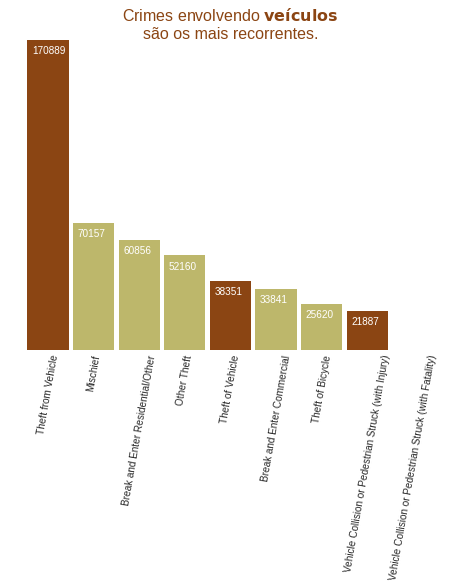

In [27]:
#Atribuindo Cores para o gráfico dos tipos de crimes realizados em Vancouver. 
marron_claro = '#BDB76B'
marron_medio = '#B8860B'
marron_escuro = '#8B4513'
cinza_claro = '#CFCDCE'
cinza_medio = '#A2A1A3'
cinza_escuro = '#787878'


cores_grafico01 = [marron_escuro, marron_claro, marron_claro, marron_claro,  marron_escuro, marron_claro,  
        marron_claro, marron_escuro, marron_escuro]

#Criando 
fig, ax = plt.subplots(figsize=(8,6))
width = 0.9
crimes_prin = ax.bar(cont_crimes.Crime, cont_crimes.Quantidade, width, color=cores_grafico01, align='center')
          
#Removendo os grids e eixos do gráfico
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Removendo eixo y
plt.gca().axes.get_yaxis().set_visible(False)

#labels do eixo
plt.xticks(rotation=80)

# Variável utilizar para determinar a distância do texto do título do eixo y. 
x_text_antes = 0.5

#Adicionando um Título ao gráfico
plt.text(x= x_text_antes, y=1,
         s='Crimes envolvendo $\\bf{veículos}$\n'
         'são os mais recorrentes.',
         horizontalalignment='center',
         verticalalignment='center', fontsize=16, color=marron_escuro, transform=ax.transAxes)

#Chamando a função que irá adicionar os rótulos dos valores para cada categoria dos tipos de crimes. 
set_label_y_in_bar(crimes_prin)
plt.show()

In [28]:
total_crimes = cont_crimes.Quantidade.sum()
total_crimes

474015

In [29]:
# Calcular a porcentagem dos crimes mais recorrentes envolvendo veículos
total_crimes_mais_recorrentes_veiculos = cont_crimes['Quantidade'][0] + cont_crimes['Quantidade'][4] + cont_crimes['Quantidade'][7] + cont_crimes['Quantidade'][8]
porcentagem_crimes_mais_recorrentes__veiculos = (total_crimes_mais_recorrentes_veiculos * 100) / total_crimes
print('O total de crimes ocorridos envolvendo Veículos é de {}, representando {:.2f}% do total de crimes ocorridos em Vancouver.'.format(total_crimes_mais_recorrentes_veiculos,
                                                                                                porcentagem_crimes_mais_recorrentes__veiculos))

O total de crimes ocorridos envolvendo Veículos é de 231381, representando 48.81% do total de crimes ocorridos em Vancouver.


A análise revelou que nos anos de 2003 a 2017, quase a metade do total dos crimes ocorridos em Vancouver estavam relacionados ao uso de Veículos, tais como: Uso de Veículos para cometer crimes, Roubo de veículos e colisões envolvendo veículos.

*2. Quais os 10 bairros com maior número de ocorrências de crimes e quais os crimes mais recorrentes no bairro com maior concentração de crimes?*

In [30]:
# Adicionando os 10 bairros com maior recorrência de crimes em um Dataframe.
cont_bairros = crimes['Bairro'].value_counts()
crimes_bairros_10 = cont_bairros[:10].reset_index()

In [31]:
crimes_bairros_10.rename(columns={'Quantidade': 'Bairro', 'Quantidade': 'Quantidade'}, inplace=True)

In [32]:
crimes_bairros_10.head(10)

,index,Bairro
0,Central Business District,110945
1,West End,41352
2,Fairview,32161
3,Mount Pleasant,30534
4,Grandview-Woodland,27180
5,Renfrew-Collingwood,26761
6,Kitsilano,26698
7,Kensington-Cedar Cottage,24941
8,Strathcona,20917
9,Hastings-Sunrise,18126


In [33]:
# Renomeando os atributos.
crimes_bairros_10.rename(columns={'index':'Bairro','Bairro':'Quantidade'}, inplace=True)

In [34]:
crimes_bairros_10.head(10)

,Bairro,Quantidade
0,Central Business District,110945
1,West End,41352
2,Fairview,32161
3,Mount Pleasant,30534
4,Grandview-Woodland,27180
5,Renfrew-Collingwood,26761
6,Kitsilano,26698
7,Kensington-Cedar Cottage,24941
8,Strathcona,20917
9,Hastings-Sunrise,18126


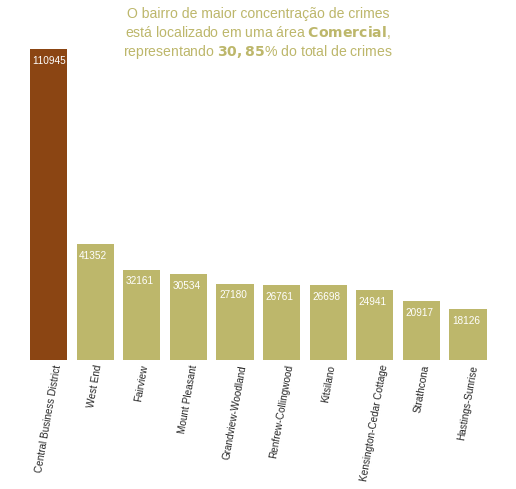

In [35]:
cores_grafico02 = [marron_escuro, marron_claro, marron_claro, marron_claro,   marron_claro, marron_claro,  
        marron_claro,  marron_claro, marron_claro, marron_claro]

fig, ax = plt.subplots(figsize=(9,6))
width = 9
crimes_bairros = ax.bar(crimes_bairros_10.Bairro, crimes_bairros_10.Quantidade, color= cores_grafico02, align='center')
          
#Removendo os grids e eixos do gráfico
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Removendo eixo y
plt.gca().axes.get_yaxis().set_visible(False)

#labels do eixo
#ax.set_xticklabels(labels_bairros);
plt.xticks(rotation=80)

x_text_antes = 0.5

#Adicionando um Título ao gráfico
plt.text(x= x_text_antes, y=1,
         s='O bairro de maior concentração de crimes\n'
           'está localizado em uma área $\\bf{Comercial}$,\n'
           'representando $\\bf{30,85}$% do total de crimes'
        , horizontalalignment='center',
         verticalalignment='center', fontsize=14, color= marron_claro, transform=ax.transAxes)

set_label_y_in_bar(crimes_bairros)
plt.show()

In [36]:
# Calculando o total de crimes praticados
total_crimes = crimes_bairros_10['Quantidade'].sum()

In [37]:
# Calculando a porcentagem do bairro com maior número de crimes.
porcentagem_bairro = (crimes_bairros_10.Quantidade[0] * 100) / total_crimes

print('O Bairro, {}, possui o total de {} crimes, representando {:.2f}% do total de crimes ocorridos em Vancouver.'.format(crimes_bairros_10.Bairro[0],
                                                                                                crimes_bairros_10.Quantidade[0],
                                                                                                 porcentagem_bairro))


O Bairro, Central Business District, possui o total de 110945 crimes, representando 30.85% do total de crimes ocorridos em Vancouver.


Tipos de crimes ocorridos no bairro com maior número de ocorrências.  

In [38]:
# Agrupando os tipos de crimes
tipo_crime = crimes.groupby(crimes.Crime)

In [39]:
tipo_crime['Bairro'].describe()

,count,unique,top,freq
Crime,,,,
Break and Enter Commercial,33841,24,Central Business District,9371
Break and Enter Residential/Other,60856,24,Grandview-Woodland,4515
Mischief,70157,24,Central Business District,16671
Other Theft,52160,24,Central Business District,19243
Theft from Vehicle,170889,24,Central Business District,48003
Theft of Bicycle,25620,24,Central Business District,6907
Theft of Vehicle,38351,24,Central Business District,4016
Vehicle Collision or Pedestrian Struck (with Fatality),254,24,Central Business District,41
Vehicle Collision or Pedestrian Struck (with Injury),21887,24,Central Business District,3188


Adicionando em um Dataframe para facilitar a visualização.

In [40]:
#Adicionando em um Dataframe os tipos de crimes pelo bairro que possui maior número de ocorrência.

data2 = {'Crime':['Roubos com uso de Veículos', 'Outros Roubos', 'Vandalismo','Crimes em Comércio',
          'Roubo de Bicicleta', 'Crimes em Residencia', 'Roubo de Veículos', 
          'Colisão de Veículo/ferimento', 
          'Colisão de Veículo/morte'],
        'Quantidade':[48003, 19243, 16671, 9371, 6907, 4515, 4016, 3188, 41]}

tipos_crimes_bairros = pd.DataFrame(data2)

In [41]:
tipos_crimes_bairros.head(10)

,Crime,Quantidade
0,Roubos com uso de Veículos,48003
1,Outros Roubos,19243
2,Vandalismo,16671
3,Crimes em Comércio,9371
4,Roubo de Bicicleta,6907
5,Crimes em Residencia,4515
6,Roubo de Veículos,4016
7,Colisão de Veículo/ferimento,3188
8,Colisão de Veículo/morte,41


In [42]:
labels_tipos_crimes_bairro = ['Roubos com uso de Veículos', 'Outros Roubos', 'Vandalismo','Crimes em Comércio',
          'Roubo de Bicicleta', 'Crimes em Residencia', 'Roubo de Veículos', 
          'Colisão de Veículo/ferimento', 
          'Colisão de Veículo/morte']

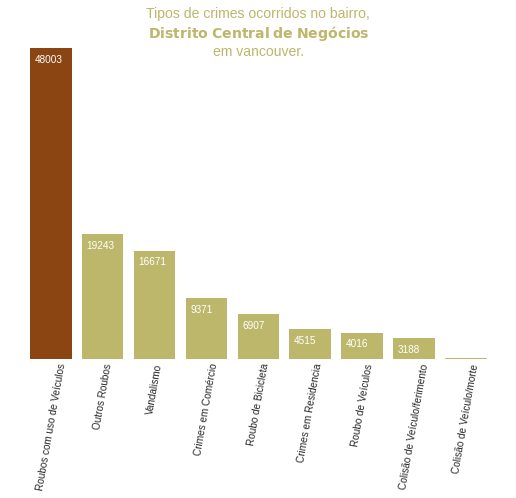

In [43]:
cores_grafico03 = [marron_escuro, marron_claro, marron_claro, marron_claro,  marron_claro, marron_claro,  
        marron_claro, marron_claro, marron_claro, marron_claro]


fig, ax = plt.subplots(figsize=(9,6))
width = 9

crimes_bairros_grafico = ax.bar(tipos_crimes_bairros.Crime, tipos_crimes_bairros.Quantidade, color= cores_grafico03, align='center')
          
#Removendo os grids e eixos do gráfico
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Removendo eixo y
plt.gca().axes.get_yaxis().set_visible(False)

#labels do eixo
ax.set_xticklabels(labels_tipos_crimes_bairro);
plt.xticks(rotation=80)

x_text_antes = 0.5

#Adicionando um Título ao gráfico
plt.text(x= x_text_antes, y=1,
         s='Tipos de crimes ocorridos no bairro,\n'
         '$\\bf{Distrito}$ $\\bf{Central}$ $\\bf{de}$ $\\bf{Negócios}$\n'
         'em vancouver.'
         , horizontalalignment='center',
         verticalalignment='center', fontsize=14, color= marron_claro, transform=ax.transAxes)

set_label_y_in_bar(crimes_bairros_grafico)
plt.show()

O Bairro com maior ocorrência policial obteve cerca de 30,85% de reclamações do total de ocorrências, localizado em uma área nobre da cidade, conhecida como Distrito Central de Negócios, além disso, os tipos de crimes mais relatados foram Roubos com uso de Veículos e outros Roubos. 

*3. Existe alguma tendência ascendente anual no número de registro de crimes?*

In [44]:
# Criando uma tabela dinâmica para visualizar a tendência e sanzonalidade dos crimes. 
dfcrimes_por_data = pd.pivot_table(crimes, values=['Crime'],index = ['Data'], aggfunc='count')

In [45]:
dfcrimes_por_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5308 entries, 2003-01-01 to 2017-07-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Crime   5308 non-null   int64
dtypes: int64(1)
memory usage: 82.9 KB


Realizando a análise do componente de tendência dos dados.

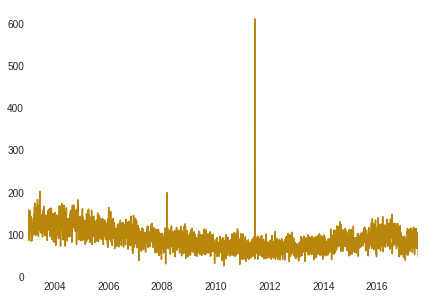

In [46]:
ax = dfcrimes_por_data.Crime.plot(figsize=(7,5), color=marron_medio)

#Removendo os grids e eixos do gráfico
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel('')
plt.legend('')

plt.show()

Observa-se que há um ruído interferindo a interpretação adequada da série temporal dos crimes. Dessa forma aplicaremos a função de média móvel como possível solução.

**Média Móvel Simples (MMS)**

A média móvel simples (MMS), calcula a média através dos valores mais recentes numa série de dados.

In [47]:
#Aplicando a média Móvel para eliminação de ruídos na série.
dfcrimes_por_data.Crime.rolling(12).mean()

Data
2003-01-01          NaN
2003-01-02          NaN
2003-01-03          NaN
2003-01-04          NaN
2003-01-05          NaN
                ...    
2017-07-09    90.833333
2017-07-10    91.750000
2017-07-11    92.166667
2017-07-12    91.083333
2017-07-13    86.833333
Name: Crime, Length: 5308, dtype: float64

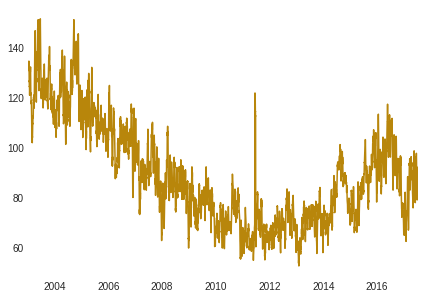

In [48]:
# Visualizando o resultado da aplicação da média móvel.
ax = dfcrimes_por_data.Crime.rolling(12).mean().plot(figsize=(7,5), color=marron_medio)

#Removendo os grids e eixos do gráfico
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel('')
plt.legend('')

plt.show()

Como segunda opção vamos aplicar a soma das ocorrências anuais para realizar a análise de tendência.

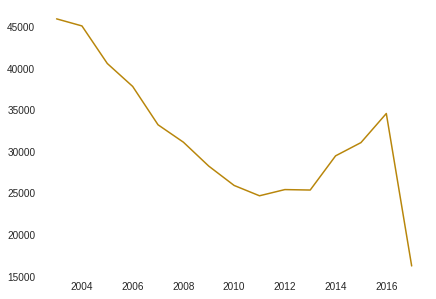

In [49]:
#Realizando a análise de tendência anual.
ax = dfcrimes_por_data.Crime.groupby(dfcrimes_por_data.index.year).sum().plot(figsize=(7,5), color=marron_medio)

#Removendo os grids e eixos do gráfico
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel('')
plt.show()


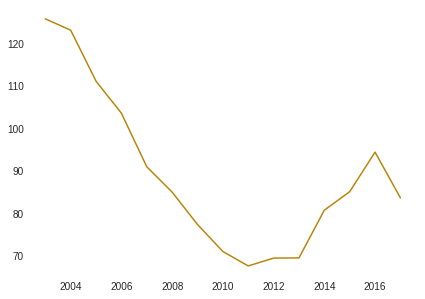

In [50]:
ax = dfcrimes_por_data.groupby(dfcrimes_por_data.index.year).agg({'Crime':'mean'}).plot(figsize=(7,5), color=marron_medio)

#Removendo os grids e eixos do gráfico
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel('')
plt.legend('')
plt.show()



Observou-se que no início da pesquisa houve um decrescimento do número de ocorrências de crimes seguindo até o ano de 2011, após esse período tendenciou-se a um acréscimo constante até alcançar o pico máximo no início do ano de 2016, e logo após esse período, os números voltaram a diminuir. 

*4. Quais os meses mais perigosos na cidade?*

*Analisando o comportamento sazonal dos dados*

In [51]:
# Aplicando a função de sazonalidade
dfcrimes_por_data.Crime.diff()

Data
2003-01-01     NaN
2003-01-02   -24.0
2003-01-03    10.0
2003-01-04   -13.0
2003-01-05   -24.0
              ... 
2017-07-09    11.0
2017-07-10    -7.0
2017-07-11     7.0
2017-07-12    -9.0
2017-07-13   -44.0
Name: Crime, Length: 5308, dtype: float64

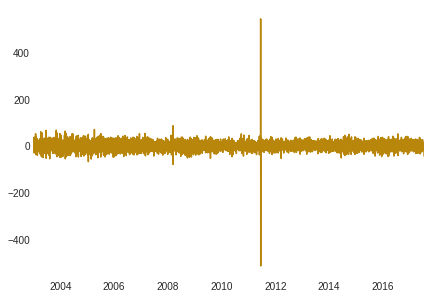

In [52]:
# Visualizando a sazonalidade
ax = dfcrimes_por_data.Crime.diff().plot(figsize=(7,5),color=marron_medio)
#Removendo os grids e eixos do gráfico
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel('')

plt.show()

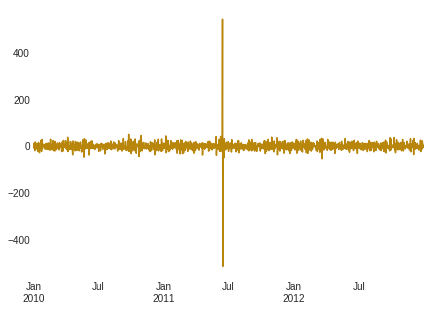

In [53]:
#Aplicando um filtro para observar melhor a sazonalidade na série.
filtro = (dfcrimes_por_data.index.year >= 2010) & (dfcrimes_por_data.index.year <= 2012)
ax = dfcrimes_por_data[filtro].Crime.diff().plot(figsize=(7,5), color=marron_medio)

#Removendo os grids e eixos do gráfico
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel('')
plt.show()

O gráfico atual não nos permite realizar nenhuma inferência de sazonalidade, nesse caso, faremos a análise utilizando o período mensal, com a finalidade de encontrar algum resultado favorável.

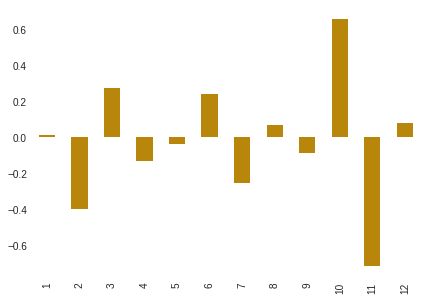

In [54]:
#Visualizando se existe sazonalidade mensal.
ax = dfcrimes_por_data.Crime.diff().groupby(dfcrimes_por_data.index.month).mean().plot(kind='bar', figsize=(7,5), color=marron_medio)

#Removendo os grids e eixos do gráfico
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel('')

plt.show()

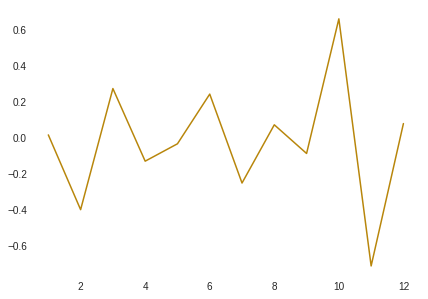

In [55]:
ax = dfcrimes_por_data.Crime.diff().groupby(dfcrimes_por_data.index.month).mean().plot(figsize=(7,5), color=marron_medio)

#Removendo os grids e eixos do gráfico
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel('')


plt.show()

Percebeu-se que os meses de Março, Junho ocorre um aumento no número de ocorrências e que o mês de Outubro é o mês com maior registro de casos, apontando ser o mês mais perigoso da cidade.

*5. Quais os dias mais perigosos na cidade?*

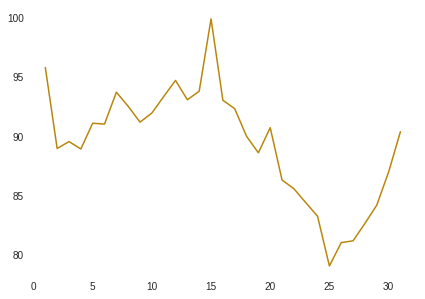

In [56]:
ax = dfcrimes_por_data.groupby(dfcrimes_por_data.index.day).agg({'Crime':'mean'}).plot(figsize=(7,5), color=marron_medio)
#Removendo os grids e eixos do gráfico
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend('')
plt.xlabel('')
plt.show()
plt.show()

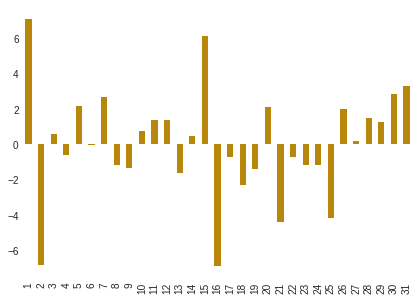

In [57]:
#Visualizando se existe sazonalidade por dia.
ax = dfcrimes_por_data.Crime.diff().groupby(dfcrimes_por_data.index.day).mean().plot(kind='bar', figsize=(7,5), color=marron_medio)

#Removendo os grids e eixos do gráfico
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend('')
plt.xlabel('')
plt.show()
plt.show()

Os dias mais perigosos da cidade indicados foram dia 01 e 15 de cada mês.